## Actividad 2

### Solución cerrada de regresión lineal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

In [3]:
class regressionLineal():

    def __init__(self, tipoDeDatos, N):
        self.tipoDeDatos = tipoDeDatos
        self.tamano = N

    def visualizar(self, y, x, num):

        plt.figure(figsize=[8,6])
        plt.title("Scatter Plot")
        plt.xlabel("Variable Independiente X")
        plt.ylabel("Variable Dependiente Y")
        plt.scatter(x[:num], y[:num], c='#008080', alpha=0.5)

        option = int(input("(1) Para visualizar | (2) Para Guardar: "))
        if option == 1:
            plt.show()
        elif option == 2:
            plt.savefig("imagen1.jpg")

    def optimizar(self, y, x):
        X = np.array([[i, 1] for i in x])
        theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        return theta
    
    # def optimizar(self, y, x):
    #     xNew = x.reshape((-1,1))
    #     modelo = LinearRegression()
    #     modelo.fit(xNew, y)
    #     return (modelo.intercept_, modelo.coef_)
    
    def resultado(self, x, y, m, b, num):
        plt.figure()
        plt.scatter(x[:num], y[:num], marker = '.')
        x2 = np.linspace(0, max(x), 1000)
        y2 = m*x2 + b
        plt.plot(x2, y2, c='#ff0000')
        plt.show()

In [3]:
tipoDeDatos = input("Tipo de datos (simulado | real): ")
N = 1000
r = regressionLineal(tipoDeDatos, N)

In [17]:
# variable independiente x
x = np.random.uniform(0.0, 3.0, N)

# variable dependiente y
error = np.random.uniform(2.0, 4.0, N)
y = 5 + 2*x + error

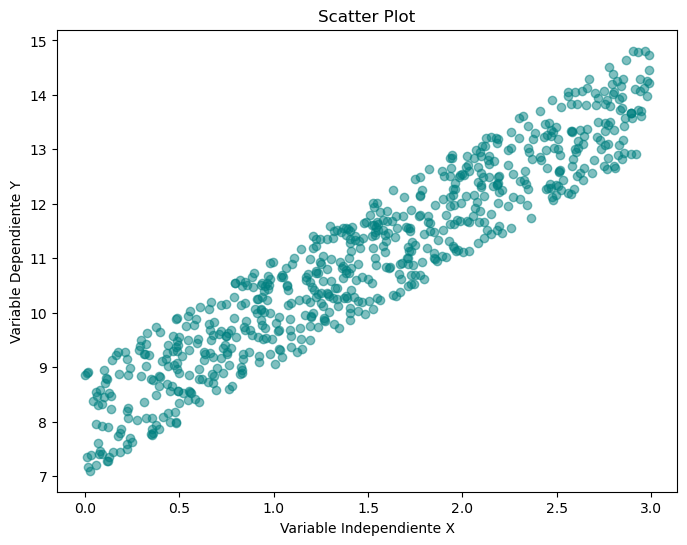

In [5]:
num = int(input(f"Numero de datos a visualizar (1 a {N}): "))
r.visualizar(y, x, num)

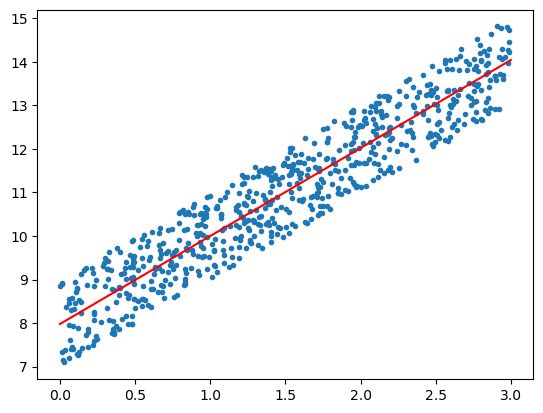

In [16]:
m, b = r.optimizar(y, x)
r.resultado(x, y, m, b, num)

In [7]:
print(m, b)

2.0205589632585177 7.980402430723404


### Regresión polinomial

In [4]:
import pandas as pd

In [5]:
csv = pd.read_csv("measurements.csv")
csv

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [7]:
print(csv['AC'].sum(), csv['rain'].sum(), csv['sun'].sum())

30 48 32


In [8]:
def fixfloats(value):
    value = value.replace(',','.')
    return float(value)

In [9]:
csv['distance'] = csv['distance'].apply(fixfloats)
csv['consume'] = csv['consume'].apply(fixfloats)
csv = csv.astype({'gas_type':'str'})

csv['specials'] = csv['specials'].fillna('None')

csv = csv.dropna(subset=['temp_inside'])
csv['temp_inside'] = csv['temp_inside'].apply(fixfloats)

csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       376 non-null    float64
 1   consume        376 non-null    float64
 2   speed          376 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   376 non-null    int64  
 5   specials       376 non-null    object 
 6   gas_type       376 non-null    object 
 7   AC             376 non-null    int64  
 8   rain           376 non-null    int64  
 9   sun            376 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 38.2+ KB


In [10]:
csv.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,None,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,None,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,None,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,None,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,None,E10,0,0,0,NaN,NaN


In [11]:
r2 = regressionLineal("real", len(csv))

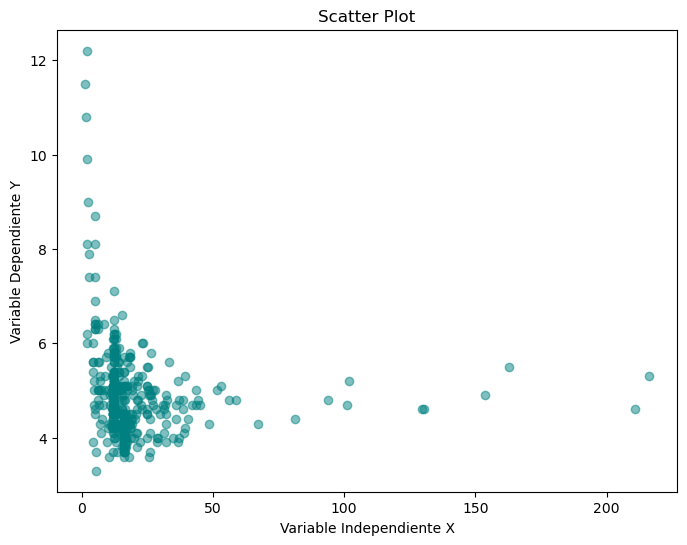

In [12]:
r2.visualizar(csv['consume'], csv['distance'], len(csv))

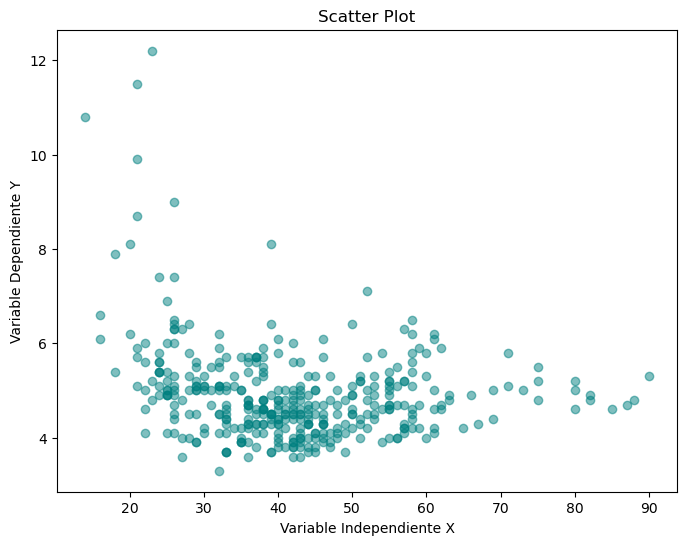

In [13]:
r2.visualizar(csv['consume'], csv['speed'], len(csv))

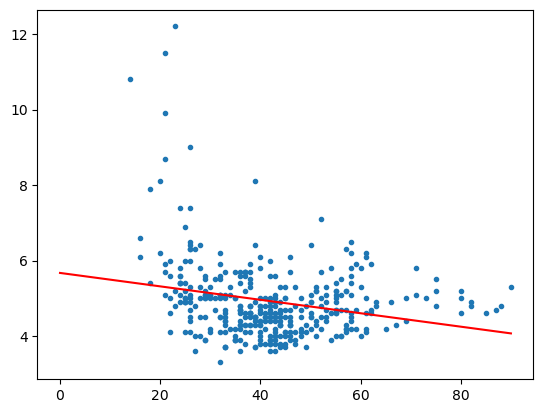

In [15]:
m2, b2 = r2.optimizar(csv['consume'], csv['speed'])
r2.resultado(csv['speed'], csv['consume'], m2, b2, len(csv))

In [17]:
print(m2, b2)

-0.017797706888625253 5.672012297539764


### Regresión con penalización